In [39]:
from PIL import Image
import pygame
import glob
import os

pygame.init()
screen = pygame.display.set_mode((600,400))
pygame.display.set_caption("Trace")
clock = pygame.time.Clock()

loop = True
press = False
color = "black"
screen.fill(pygame.Color(255, 255, 255))
cnt = 0
[os.remove(png) for png in glob.glob("*png")]
while loop:
    try:
        #pygame.mouse.set_visible(False)
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                loop = False
            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_c:
                    screen.fill(pygame.Color(255, 255, 255))
                if event.key == pygame.K_s:
                    if cnt < 10:
                        pygame.image.save(screen, f"screenshot00.png")
                    else:
                        pygame.image.save(screen, f"screenshot{cnt}.png")
                    cnt += 1
                if event.key == pygame.K_g:
                        frames = []
                        imgs = glob.glob("*.png")
                        for i in imgs:
                            new_frame = Image.open(i)
                            frames.append(new_frame)

                        # Save into a GIF file that loops forever
                        frames[0].save('animated.gif', format='GIF',
                                       append_images=frames[1:],
                                       save_all=True,
                                       duration=300, loop=0)
                        os.startfile("animated.gif")

    
        px, py = pygame.mouse.get_pos()
        if pygame.mouse.get_pressed() == (1,0,0):
            pygame.draw.rect(screen, (0,0,0), (px,py,30,30))
        if pygame.mouse.get_pressed() == (0,0,1):
            pygame.draw.rect(screen, (255,255,255), (px,py,10,10))

        if event.type == pygame.MOUSEBUTTONUP:
            press == False
        pygame.display.update()
        clock.tick(1000)
    except Exception as e:
        print(e)
        pygame.quit()
        
pygame.quit()

In [43]:
from keras.preprocessing import image
from PIL import Image,ImageChops 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# helper functions
def show_min_max(array, i):
  random_image = array[i]
  print(random_image.min(), random_image.max())

def plot_image(array, i, labels):
  plt.imshow(np.squeeze(array[i]))
  plt.title(" Digit " + str(labels[i]))
  plt.xticks([])
  plt.yticks([])
  plt.show()

def predict_image(model, x):
  x = x.astype('float32')
  x = x / 255.0

  x = np.expand_dims(x, axis=0)

  image_predict = model.predict(x, verbose=0)
  print("Predicted Label: ", np.argmax(image_predict))

  plt.imshow(np.squeeze(x))
  plt.xticks([])
  plt.yticks([])
  plt.show()
  return image_predict

def plot_value_array(predictions_array, true_label, h):
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array[0], color="#777777")
  plt.ylim([(-1*h), h])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  plt.show()

model = tf.keras.models.load_model('neural_net1.h5')

Predicted Label:  2


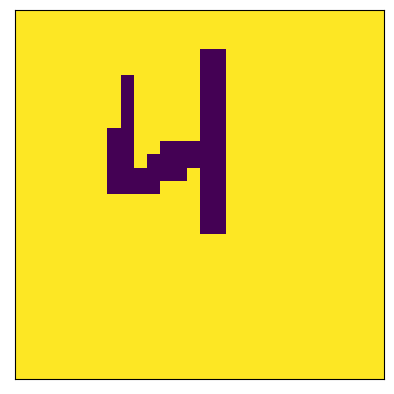

In [44]:
path = "screenshot00.png"

img = tf.keras.preprocessing.image.load_img(path, target_size=(28,28), color_mode = "grayscale")
x = tf.keras.preprocessing.image.img_to_array(img)
true_label = 1
p_arr = predict_image(model, x)